In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

## Carregando o dataset

In [292]:
df = pd.read_csv("icf.txt")

## EDA

In [293]:
lw = np.array([len(w) for w in df['word']])
maiorp = df.iloc[np.where(lw == max(lw))[0][0]]['word']
menorp = df.iloc[np.where(lw == min(lw))[0][0]]['word']

lf = np.array(df['frequency'])
maisfp = df.iloc[np.where(lf == max(lf))[0][0]]['word']
menosfp = df.iloc[np.where(lf == min(lf))[0][0]]['word']

print(f"Menor palavra: {menorp} | Maior palavra: {maiorp}")
print(f"Menor palavra: {min(lw)} letra(s) | Maior palavra: {max(lw)} letras\n")

print(f"Palavra mais frequente: {menosfp} | Palavra menos frequente: {maisfp}")
print(f"Maior frequência: {min(lf)} | Menor frequência: {max(lf)}")

Menor palavra: é | Maior palavra: pneumoultramicroscopicossilicovulcanoconiótico
Menor palavra: 1 letra(s) | Maior palavra: 46 letras

Palavra mais frequente: de | Palavra menos frequente: cequelado
Maior frequência: 3.01922378 | Menor frequência: 24.7411827


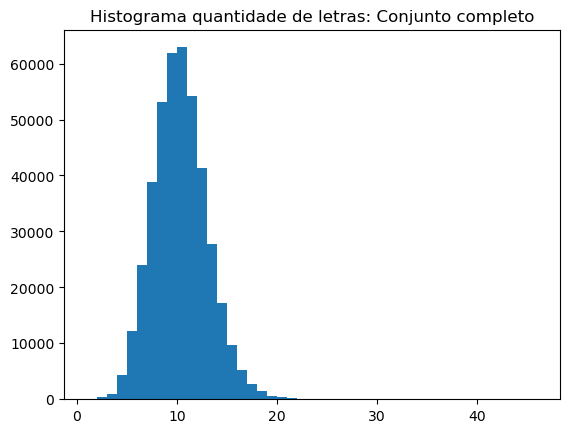

In [294]:
plt.hist(lw, 45)
plt.title("Histograma quantidade de letras: Conjunto completo")
plt.show()

(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00, 7.0000e+00,
        6.0000e+00, 1.2000e+01, 2.3000e+01, 4.7000e+01, 6.6000e+01,
        1.3300e+02, 2.9300e+02, 4.0500e+02, 5.5900e+02, 8.0700e+02,
        1.1820e+03, 1.4830e+03, 1.9160e+03, 2.5200e+03, 3.1690e+03,
        3.7360e+03, 4.6390e+03, 5.5090e+03, 6.3820e+03, 7.1480e+03,
        7.8550e+03, 8.8110e+03, 1.0066e+04, 1.0648e+04, 1.1833e+04,
        1.2659e+04, 1.3717e+04, 1.4574e+04, 1.5438e+04, 1.6488e+04,
        1.6764e+04, 1.6253e+04, 1.7516e+04, 1.9295e+04, 2.8536e+04,
        4.1446e+04, 4.8077e+04, 5.8008e+04, 6.7730e+03, 1.2010e+03,
        3.4750e+03]),
 array([ 3.01922378,  3.49144028,  3.96365678,  4.43587327,  4.90808977,
         5.38030627,  5.85252277,  6.32473927,  6.79695577,  7.26917226,
         7.74138876,  8.21360526,  8.68582176,  9.15803826,  9.63025476,
        10.10247125, 10.57468775, 11.04690425, 11.51912075, 11.99133725,
        12.46355375, 12.93577024, 13.40798674, 13.88020324, 14.35241974,
 

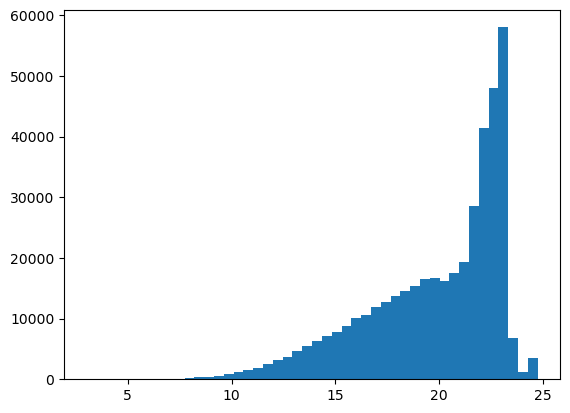

In [295]:
plt.hist(df['frequency'], 46)

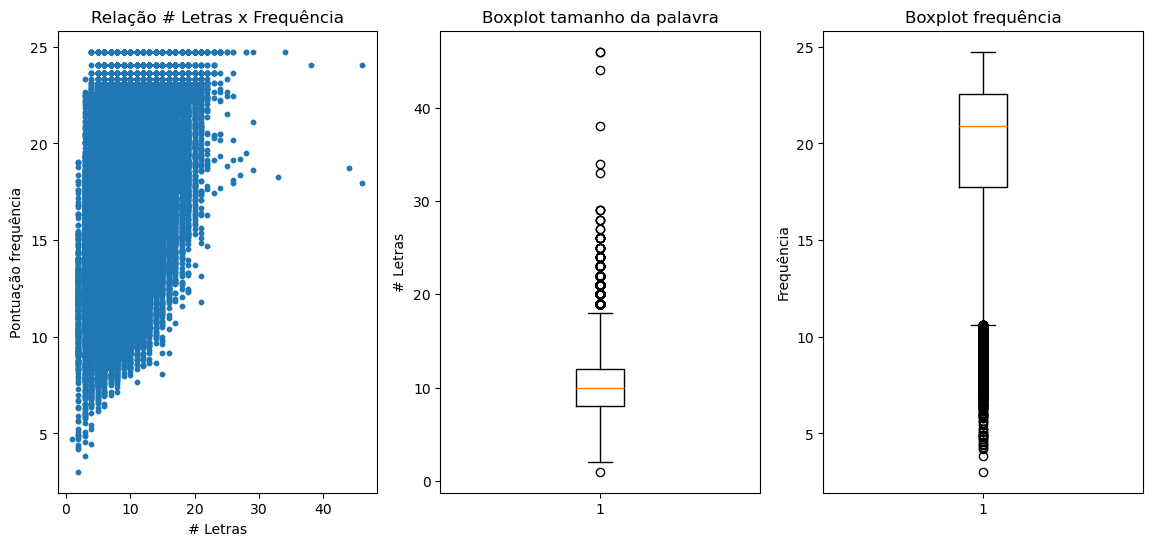

Box # Letras:
Q1: 8.00
Q3: 12.00
IQR: 4.00
Min: 2.0
Max: 18.0

Matrix de correlação:


array([[1.        , 0.35558931],
       [0.35558931, 1.        ]])

In [296]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))

#Queria verificar se existe algum tipo de relação linear entre frequência e quantidade de letras. Positiva e extremamente fraca.
ax[0].scatter(lw, df['frequency'], s=10)
ax[0].set_xlabel("# Letras")
ax[0].set_ylabel("Pontuação frequência")
ax[0].set_title("Relação # Letras x Frequência")

#Verificando outliers na quantidade de letras nas palavras
ax[1].boxplot(lw)
ax[1].set_ylabel("# Letras")
ax[1].set_title("Boxplot tamanho da palavra")

#Verificando outliers na quantidade de letras nas palavras
ax[2].boxplot(np.array(df['frequency']))
ax[2].set_ylabel("Frequência")
ax[2].set_title("Boxplot frequência")
plt.show()

Q1 = np.percentile(lw, 25)
Q3 = np.percentile(lw, 75)
IQR = Q3 - Q1
MINQ1 = Q1 - 1.5*IQR
MAXQ3 = Q3 + 1.5*IQR

print("Box # Letras:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(F"Min: {MINQ1}")
print(F"Max: {MAXQ3}")

print("\nMatrix de correlação:")
np.corrcoef(lw, df['frequency'])

In [297]:
#Funções para filtro
def is_outlier(item):
    return (len(item) >= MINQ1 and len(item) <= MAXQ3)

def is_very_common(item):
    return item <= 8

def is_often_used(item):
    return (item > 8 and item <= 15)

def is_hardly_used(item):
    return (item > 15)

df_wo = df[df['word'].apply(is_outlier)]

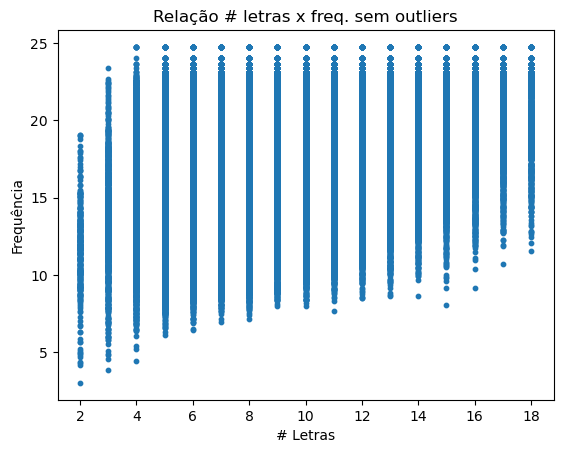

array([[1.        , 0.35802358],
       [0.35802358, 1.        ]])

In [298]:
lw_wo = np.array([len(x) for x in df_wo['word']])
plt.scatter(lw_wo, df_wo['frequency'], s=10)
plt.xlabel("# Letras")
plt.ylabel("Frequência")
plt.title("Relação # letras x freq. sem outliers")
plt.show()

np.corrcoef(lw_wo, df_wo['frequency'])

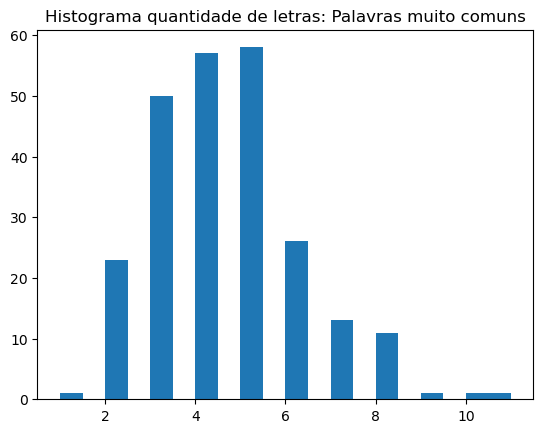

Média: 4.462809917355372
Variância: 2.744484666347927
Desvio padrão: 1.6566486248893961


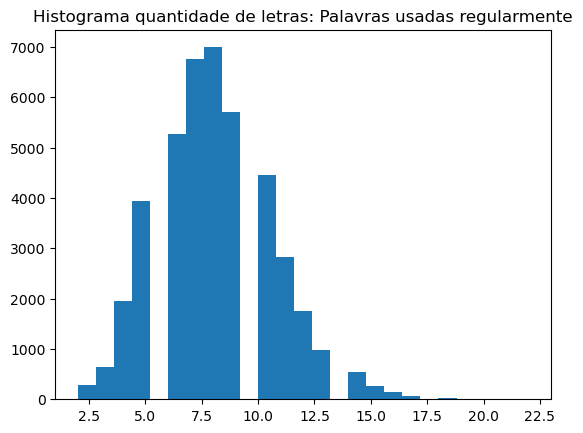

Média: 8.01137963397466
Variância: 6.431334605291467
Desvio padrão: 2.5360076114419425


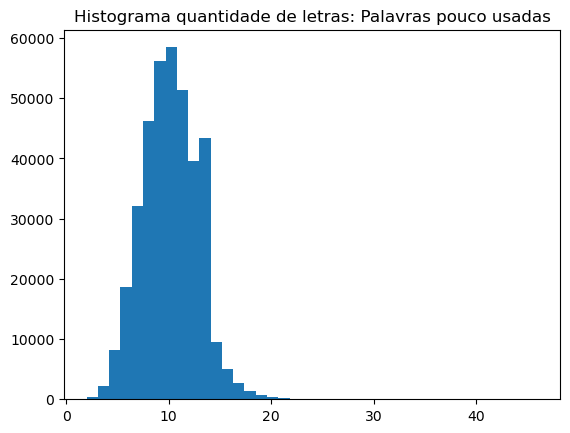

Média: 10.057837524958579
Variância: 6.964168839993804
Desvio padrão: 2.6389711707394237


In [299]:
# import scipy.stats as stats

for name, funct, bins in [("Palavras muito comuns",is_very_common, 20), ("Palavras usadas regularmente",is_often_used,25), ("Palavras pouco usadas", is_hardly_used,40)]:
    df_func = df[df["frequency"].apply(funct)]

    lw_func = np.array([len(x) for x in df_func['word']])
    plt.hist(lw_func, bins)
    plt.title(f"Histograma quantidade de letras: {name}")
    plt.show()

    mean_oftused = lw_func.mean()
    var_oftused = lw_func.var()
    std_oftused = lw_func.std()

    # x = np.linspace(mean_oftused - 3*std_oftused, mean_oftused + 3*std_oftused, 100)
    # plt.plot(x, stats.norm.pdf(x, mean_oftused, std_oftused))
    # plt.show()

    print(f"Média: {mean_oftused}")
    print(f"Variância: {var_oftused}")
    print(f"Desvio padrão: {std_oftused}")

In [300]:
#Algoritmo a ser desenvolvido
# Tenho o dataset de palavras. O agente inicialmente tem como informação a quantidade de letras da palavra, mas nenhuma letra foi descoberta ainda.
# - De primeira já filtra por número de letras. Exclui grande parte das palavras possíveis.
# - Gero a frequência de cada letra no espaço de palavras possível. Como escolher?
# - Pode ser útil gerar 2 tipos de frequência: Frequência absoluta (Conta a quantidade absoluta de uma dada letra no conjunto de palavras) -> Mais arriscado, sorte ajuda
#                                              Frequência p/palavra (Conta a quantidade de palavras que contém essa letra) -> Mais geral, reduz as palavras
# - É provavel que  a abordagem gulosa não seja a melhor
# - Posso fazer um algoritmo que arrisca uma letra que não é comum para reduzir drasticamente o conjunto de palavras possíveis
# - Escolher letras que tem frequências intermediárias pode ser útil, me lembra busca binária.
# O agente deve checar a distribuição das letras e escolher a mais provável de aparecer na palavra dependendo da quantidade de letras
# Assim que ele escolher, deve conseguir usar a informação nova para predizer a próxima.
# Preciso fazer um algoritmo que filtra as palavras conforme vai descobrindo mais letras e afina o escopo de palavras possíveis, melhorando a tomada de decisão
# - Inicialmente posso fazer um script que verifica letra por letra das palavras, comparando com um buffer que guarda as letras atuais
# - ^^^ Extremamente ineficiente ^^^
# - É possivel fazer com RegEx?

In [358]:
class Ambiente:
    def __init__(self, df: pd.DataFrame, tries: int):
        """Construtor ambiente:
            -df: pd.DataFrame Conjunto de dados com colunas ('word', 'frequency')
            -tries: int # de tentativas
        """
        assert type(df) == pd.DataFrame, "df must be a pd.Dataframe"
        assert 'word' in df.columns and 'frequency' in df.columns, "df must have columns 'word' and 'frequency'"
        self.__df = df
        self.__letters_used = []
        self.__started = False
        self.__tries_fixed = tries 

    def __random_word(self):
        """Escolhe uma palavra aleatória do conjunto de palavras"""
        word = self.__df.iloc[np.random.randint(0, len(self.__df))]['word']
        return word, len(word)
    
    def reset(self):
        """Reseta as variáveis do ambiente. Deve rodar na primeira vez executando o ambiente após ser declarado e no fim de cada episódio"""
        self.__started = True
        self.terminated = False

        self.__word, self.__word_l = self.__random_word()
        self.__curr_word = [''] * self.__word_l
        self.__letters_used = set()
        self.tries = self.__tries_fixed

    def get_solution(self):
        """Retorna a palavra solução"""
        return self.__word
    
    def get_state(self):
        """Retorna o estado atual"""
        return self.__curr_word

    def step(self, letter):
        """Executa a ação do agente, ou seja, o palpite de uma letra ou palavra"""
        if self.terminated:
            print("Episode terminated. You have to reset the environment to continue.")
            return 0

        if not self.__started:
            print("Environment did not start. You have to reset the environment to continue.")
            return 0

        A = 'abcdefghijklmnopqrstuvwxyz'

        if type(letter) == str: # Palpite de palavra
            #print(f"Palpitou uma palavra: {letter}")
            if self.__word != letter:
                self.tries = 0
            else:
                pass
                #print("GANHOU!")
            self.terminated = True
            return
        else: # Palpite de letra
            #print(f"Palpitou uma letra: {A[letter]}")
            if A[letter] in self.__letters_used:
                print("Letter already guessed.")
                return 0

            has_letter = False
            self.__letters_used.add(A[letter])
            for i in range(self.__word_l):
                if unidecode(self.__word[i]) == A[letter]:
                    has_letter = True
                    self.__curr_word[i] = self.__word[i]

            if not has_letter:
                #print("TENTATIVA RETIRADA!")
                self.tries -= 1

        if self.tries == 0:
            self.terminated = True

        return 1


In [442]:
class Agente:
    def __init__(self, df, epsilon, type_d, word_s):
        """Construtor do agente:
            -df: conjunto de dados com colunas ('word', 'frequency')
            -epsilon: float[0, 1] probabilidade de risco. Escolhe aleatoriamente uma letra.
            -word_s: tamanho da palavra
        """
        def is_word_size(item):
            return len(item) == word_s

        assert type(df) == pd.DataFrame, "df must be a pd.Dataframe"
        assert 'word' in df.columns and 'frequency' in df.columns, "df must have columns 'word' and 'frequency'"
        self.__df = df[df['word'].apply(is_word_size)]
        self.__eps = epsilon
        self.__type_d = type_d
        self.__letters_used = set()
        self.__bad_letters = set()

    def __filter(self, curr_word):
        """Filtra o conjunto de palavras possíveis baseado nas informações obtidas ao interagir com o ambiente, como errar ou acertar uma letra"""

        curr_word_set = set([unidecode(i) for i in curr_word])
        self.__bad_letters = self.__letters_used.difference(curr_word_set)
        #print(f"Letras erradas: {self.__bad_letters}")

        def is_letter(item, letter, i):
            return item[i] == letter
        
        def is_not_letter(item, bad_letters, i):
            return item[i] not in bad_letters
        
        for i in range(len(curr_word)):
            self.__df = self.__df[self.__df['word'].apply(is_not_letter, bad_letters = self.__bad_letters, i=i)]
            if curr_word[i] == '':
                continue

            self.__df = self.__df[self.__df['word'].apply(is_letter, letter=curr_word[i], i=i)]

    def __letter_dist(self):
        """Verifica quantas palavras dentro do conjunto de palavras possíveis contém cada letra do alfabeto."""

        A = 'abcdefghijklmnopqrstuvwxyz'
        self.__letter_dist_m = dict() 

        len_words = len(self.__df['word'])

        for word in self.__df['word']:
            letters_set = set(word)
            for letter in letters_set:
                seen_letters_for_word = set()
                letter_wa = unidecode(letter)
                if letter_wa in self.__letters_used:
                    continue
                
                if letter_wa not in seen_letters_for_word:
                    if letter_wa not in self.__letter_dist_m.keys():
                        self.__letter_dist_m[letter_wa] = 0
                    seen_letters_for_word.add(letter_wa)
                    self.__letter_dist_m[letter_wa] += 1/len_words

        self.__letter_dist_m = sorted(self.__letter_dist_m.items(), key=lambda x: x[1])

    def __letter_abs_dist(self):
        """Conta quantas vezes cada letra do alfabeto aparece no conjunto de palavras possíveis."""

        A = 'abcdefghijklmnopqrstuvwxyz'
        self.__letter_abs_dist_m = dict()

        len_words = len(self.__df['word'])

        for word in self.__df['word']:
            for letter in word:
                letter_wa = unidecode(letter)
                if letter_wa in self.__letters_used:
                    continue

                if letter not in self.__letter_abs_dist_m.keys():
                    self.__letter_abs_dist_m[letter_wa] = 0
                self.__letter_abs_dist_m[letter_wa] += 1/len_words

        self.__letter_abs_dist_m = sorted(self.__letter_abs_dist_m.items(), key=lambda x: x[1])

    def get_words(self):
        """Retorna o conjunto de palavras possíveis"""
        return self.__df['word']

    def act(self, curr_word):
        """Escolhe uma letra ou palavra para palpite baseado, respectivamente, na distribuição das letras e na quantidade de palavras no conjunto de palavras possíveis"""

        A = 'abcdefghijklmnopqrstuvwxyz'
        
        self.__filter(curr_word)

        if len(self.__df) == 1: #Se houver apenas uma palavra no conjunto de palavras possíveis, palpita ela
            return self.__df.iloc[0]['word']

        self.__letter_dist()
        self.__letter_abs_dist() #Não está sendo usada. Acredito que a de cima seja melhor.

        if np.random.random(1) < self.__eps:
            if self.__type_d == 0:
                most_freq = self.__letter_dist_m[np.random.randint(0, len(self.__letter_dist_m))] #Realiza uma ação gulosa. Escolhe a letra com maior frequência
            else:
                most_freq = self.__letter_abs_dist_m[np.random.randint(0, len(self.__letter_dist_m))]
            #print(f"Ação exploratória: {most_freq}")
            letter_chosen = most_freq[0]
            self.__letters_used.add(letter_chosen)
        else:
            #print(self.__letter_dist_m)
            if self.__type_d == 0:
                most_freq = self.__letter_dist_m[-1] #Realiza uma ação gulosa. Escolhe a letra com maior frequência
            else:
                most_freq = self.__letter_abs_dist_m[-1]
            #print(f"Ação gulosa: {most_freq}")
            letter_chosen = most_freq[0]
            self.__letters_used.add(letter_chosen)
        return A.index(letter_chosen)

In [443]:
def play_hang(df_words, type_d = 0, eps = 0, tries = 5):
    env = Ambiente(df_words, tries)
    env.reset()

    word_size = len(env.get_state())

    agent = Agente(df_words, eps, type_d, word_size)

    terminated = env.terminated

    while not terminated:
        current_word = env.get_state()
        letter_guess = agent.act(current_word)
        env.step(letter_guess)

        terminated = env.terminated

    if env.tries > 0:
        return 1
    return 0

In [444]:
df_verycommon = df[df['frequency'].apply(is_very_common)]
df_oftenused = df[df['frequency'].apply(is_often_used)]
df_hardlyused = df[df['frequency'].apply(is_hardly_used)]

In [445]:
play_hang(df_verycommon)

1

In [446]:
play_hang(df_oftenused)

1

In [448]:
play_hang(df_hardlyused)

1

## Análise de hiperparâmetros
Grid search simples para verificar algumas abordagens

In [458]:
eps_l = [0, 0.2, 0.5, 0.8, 1]
type_d_l = [0, 1]
df_l = [df_verycommon, df_oftenused, df_hardlyused] #NÃO É HIPERPARÂMETRO, apenas os dados
print(f"Extremamente comum:{len(df_verycommon)}, Regular:{len(df_oftenused)}, Raramente usada:{len(df_hardlyused)}")
episodes = 100

#Algoritmo custoso!
for eps in eps_l: #Probabildade de risco
    for type_d in type_d_l: #Tipo de distribuição para escolha (comum ou absoluta)
        count = 0
        count_df_l = []
        for df in df_l:
            count_df = 0
            for i in range(episodes):
                if i%10 == 0:
                    print(f"Episode: {i}")
                result = play_hang(df, type_d, eps)
                count_df += result
                count += result
            count_df_l.append(count_df)

        print(f"Epsilon:{eps} | Type: {type_d} | Win Rate(5 tries): {count/episodes*3} | Win Rate Df(5 tries): {[x/episodes for x in count_df_l]}")

Extremamente comum:242, Regular:42620, Raramente usada:376624
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Epsilon:0 | Type: 0 | Win Rate(5 tries): 8.399999999999999 | Win Rate Df(5 tries): [0.96, 0.86, 0.98]
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 0
Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50
Episode: 60
Episode: 70
Episode: 80
Episode: 90
Epsilon:0 | Type: 1 | Win Rate(5 tries): 7.529999999999999 | Win Rate Df(5 tries): [0.93, 0.75, 0.83]
Episode: 0
Episode: 

In [24]:
filename = "src/data/words.txt"
with open(filename, encoding='utf-8') as f:
    words = f.read().split('\n')

In [21]:
df = pd.read_csv(filename, index_col=None)

In [14]:
df['word'].to_csv('words.txt', index=False)

In [25]:
words

['de',
 'que',
 'do',
 'em',
 'da',
 'para',
 'com',
 'um',
 'é',
 'no',
 'não',
 'uma',
 'se',
 'os',
 'na',
 'por',
 'mais',
 'as',
 'como',
 'dos',
 'ao',
 'ou',
 'são',
 'mas',
 'eu',
 'das',
 'ser',
 'sua',
 'foi',
 'seu',
 'você',
 'muito',
 'tem',
 'nos',
 'sobre',
 'me',
 'ele',
 'já',
 'pelo',
 'também',
 'está',
 'sem',
 'pela',
 'dia',
 'isso',
 'bem',
 'quando',
 'pode',
 'até',
 'mesmo',
 'todos',
 'ainda',
 'às',
 'anos',
 'entre',
 'só',
 'fazer',
 'meu',
 'novo',
 'tudo',
 'paulo',
 'aqui',
 'ter',
 'seus',
 'este',
 'vida',
 'ela',
 'nas',
 'brasil',
 'minha',
 'tempo',
 'aos',
 'vai',
 'quem',
 'sempre',
 'pessoas',
 'pra',
 'grande',
 'assim',
 'há',
 'esse',
 'era',
 'esta',
 'onde',
 'essa',
 'agora',
 'mundo',
 'casa',
 'produto',
 'ano',
 'outros',
 'trabalho',
 'cada',
 'melhor',
 'suas',
 'porque',
 'depois',
 'ver',
 'vez',
 'hoje',
 'bom',
 'forma',
 'rio',
 'apenas',
 'parte',
 'será',
 'deus',
 'todo',
 'pois',
 'br',
 'seja',
 'estão',
 'dias',
 'foram',
 